In [2]:
%load_ext autoreload
%autoreload
%matplotlib inline
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from __future__ import absolute_import,division,print_function
import sys
import os

import pandas as pd
import numpy as np 

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
#Display and Plotting 
import matplotlib.pylab as plt 
import seaborn as sns 

/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
pd.set_option('display.float_format',lambda x:'%.5f ' % x) # pandas 
 
np.set_printoptions(precision=5,suppress=True) # numpy  
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
# seaborn plotting style 
sns.set(style='ticks',context='poster')

In [6]:
# Read the data 
# 美国消费者信心指数 
Sentiment='data/sentiment.csv'
Sentiment=pd.read_csv(Sentiment,index_col=0,parse_dates=[0])
Sentiment=Sentiment.dropna()

In [7]:
Sentiment.head()

,UMCSENT
DATE,
2000-01-01,112.00000
2000-02-01,111.30000
2000-03-01,107.10000
2000-04-01,109.20000
2000-05-01,110.70000


In [8]:
#Select the series from 2005-2016 
sentiment_short=Sentiment.loc['2005':'2016']

In [9]:
len(sentiment_short)

139

In [10]:
len(sentiment_short.dropna())

139

In [11]:
sentiment_short.shape

(139, 1)

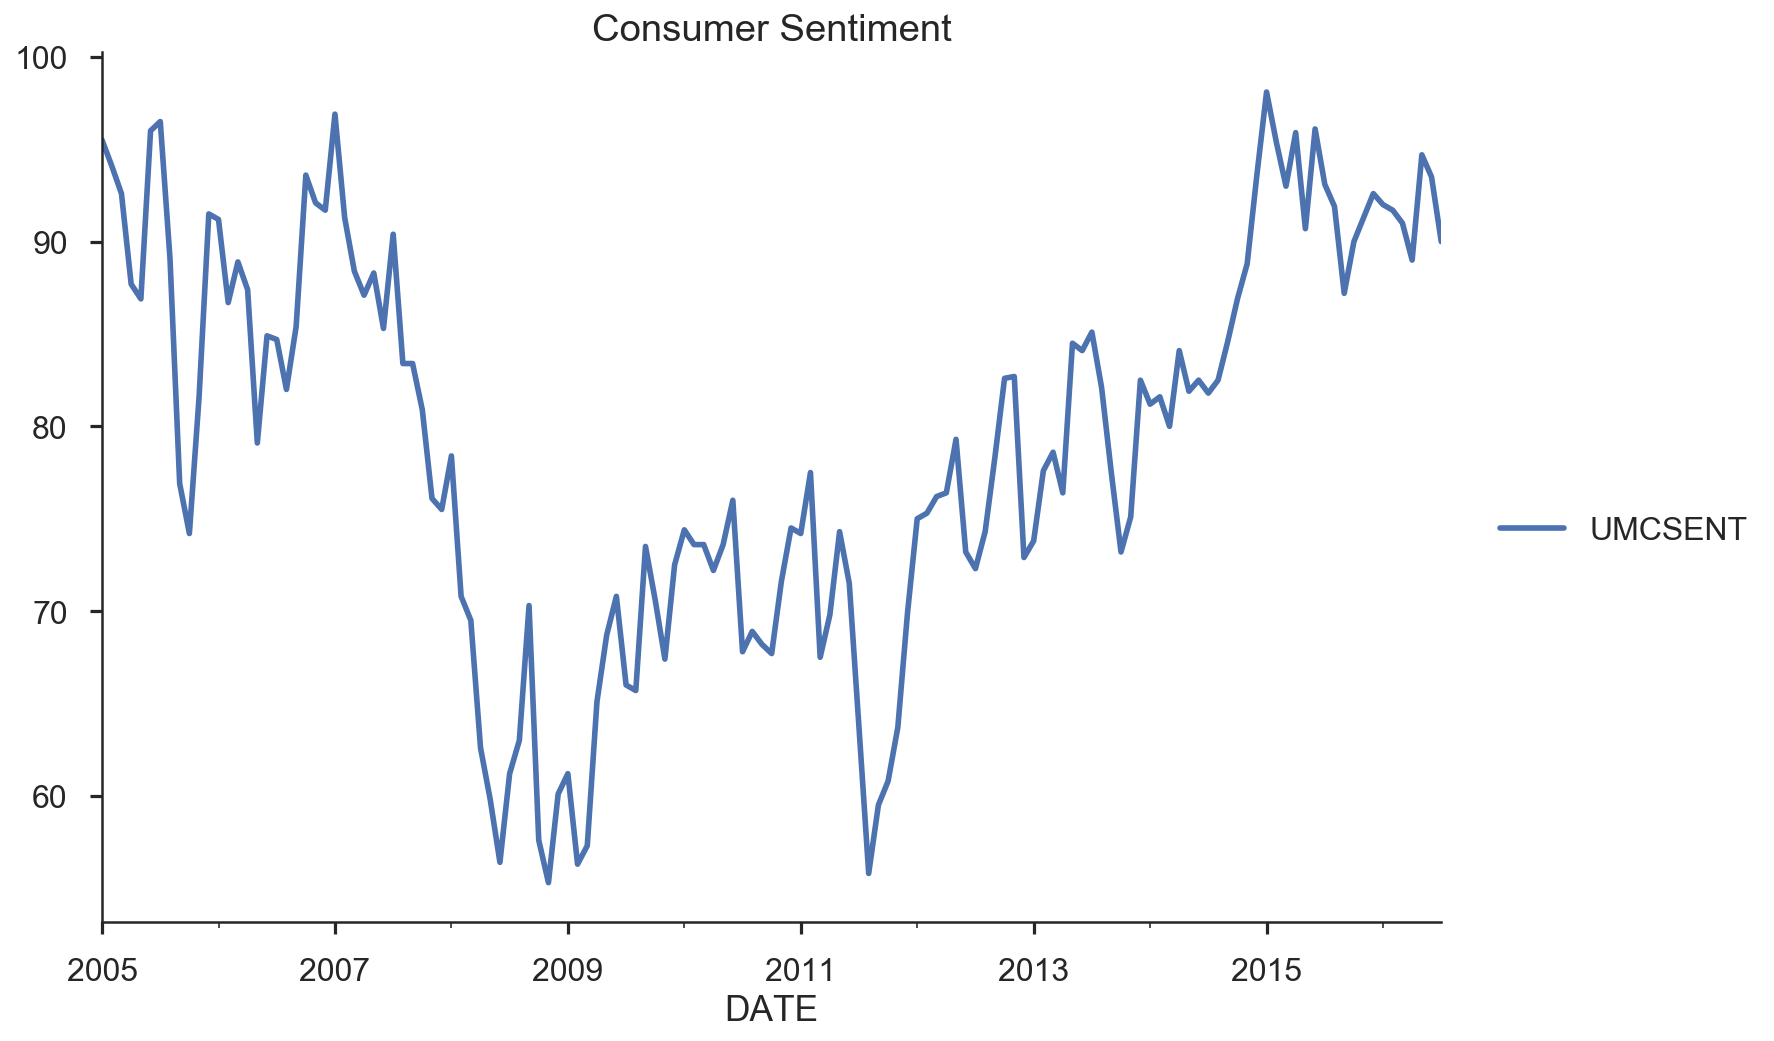

In [12]:
sentiment_short.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25,0.5))
plt.title("Consumer Sentiment")
sns.despine()
plt.show()

/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9c6d4f278>,
      dtype=object)

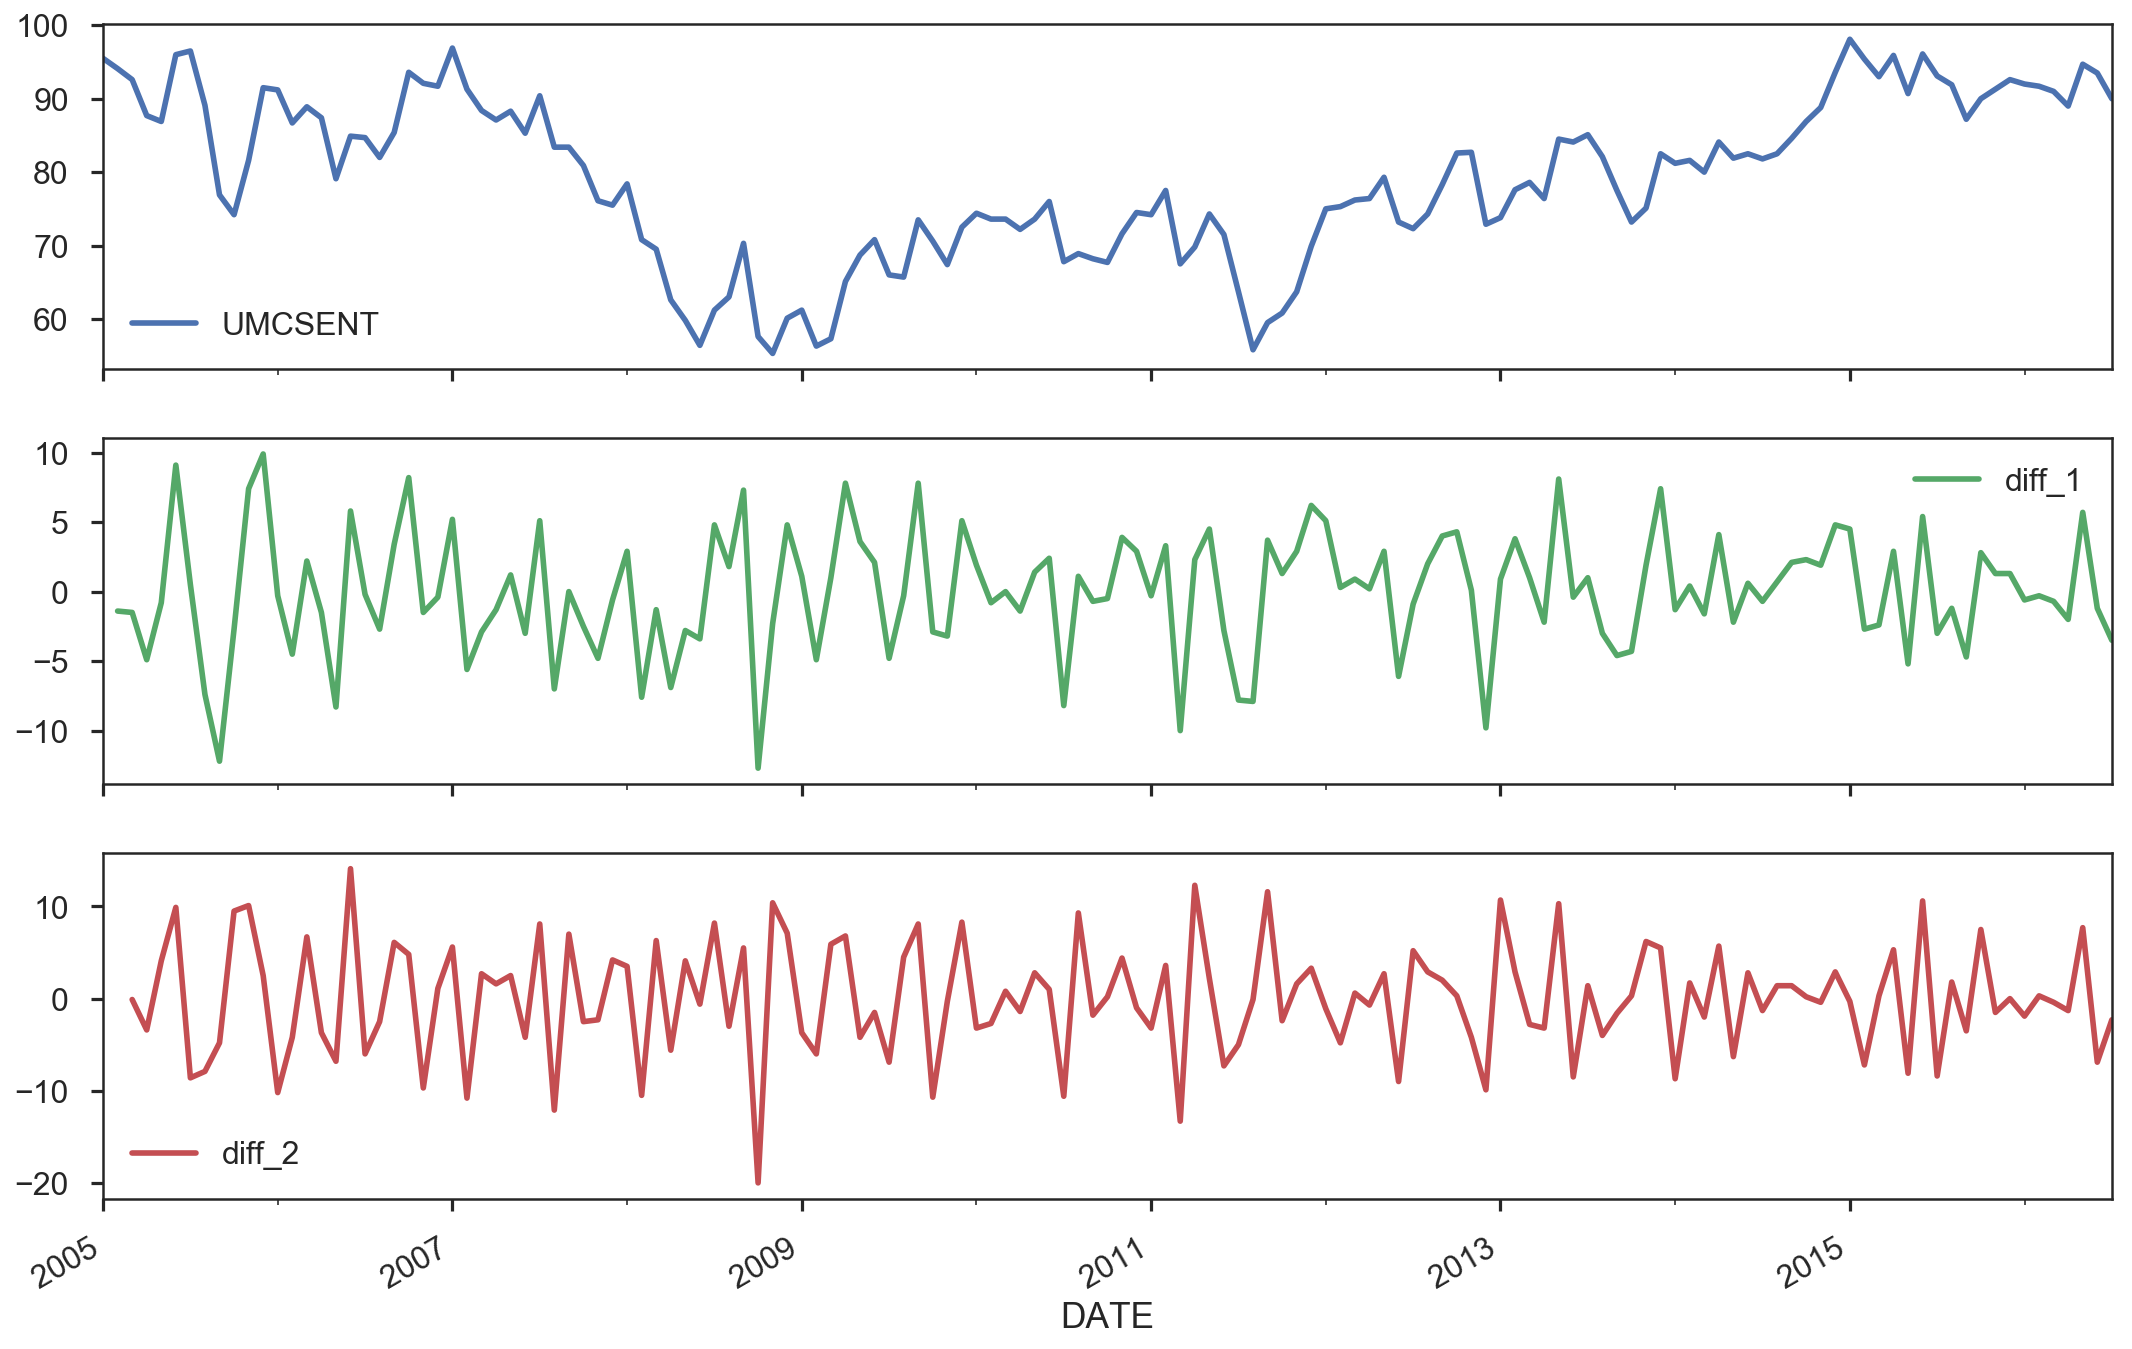

In [13]:
sentiment_short['diff_1']=sentiment_short['UMCSENT'].diff(1)

sentiment_short['diff_2']=sentiment_short['diff_1'].diff(1)

sentiment_short.plot(subplots=True,figsize=(18,12))

In [14]:
sentiment_short.head()

,UMCSENT,diff_1,diff_2
DATE,,,
2005-01-01,95.50000,nan,nan
2005-02-01,94.10000,-1.40000,nan
2005-03-01,92.60000,-1.50000,-0.10000
2005-04-01,87.70000,-4.90000,-3.40000
2005-05-01,86.90000,-0.80000,4.10000


In [15]:
sentiment_short=sentiment_short.dropna()

In [16]:
sentiment_short

,UMCSENT,diff_1,diff_2
DATE,,,
2005-03-01,92.60000,-1.50000,-0.10000
2005-04-01,87.70000,-4.90000,-3.40000
2005-05-01,86.90000,-0.80000,4.10000
2005-06-01,96.00000,9.10000,9.90000
2005-07-01,96.50000,0.50000,-8.60000
2005-08-01,89.10000,-7.40000,-7.90000
2005-09-01,76.90000,-12.20000,-4.80000
2005-10-01,74.20000,-2.70000,9.50000
2005-11-01,81.60000,7.40000,10.10000


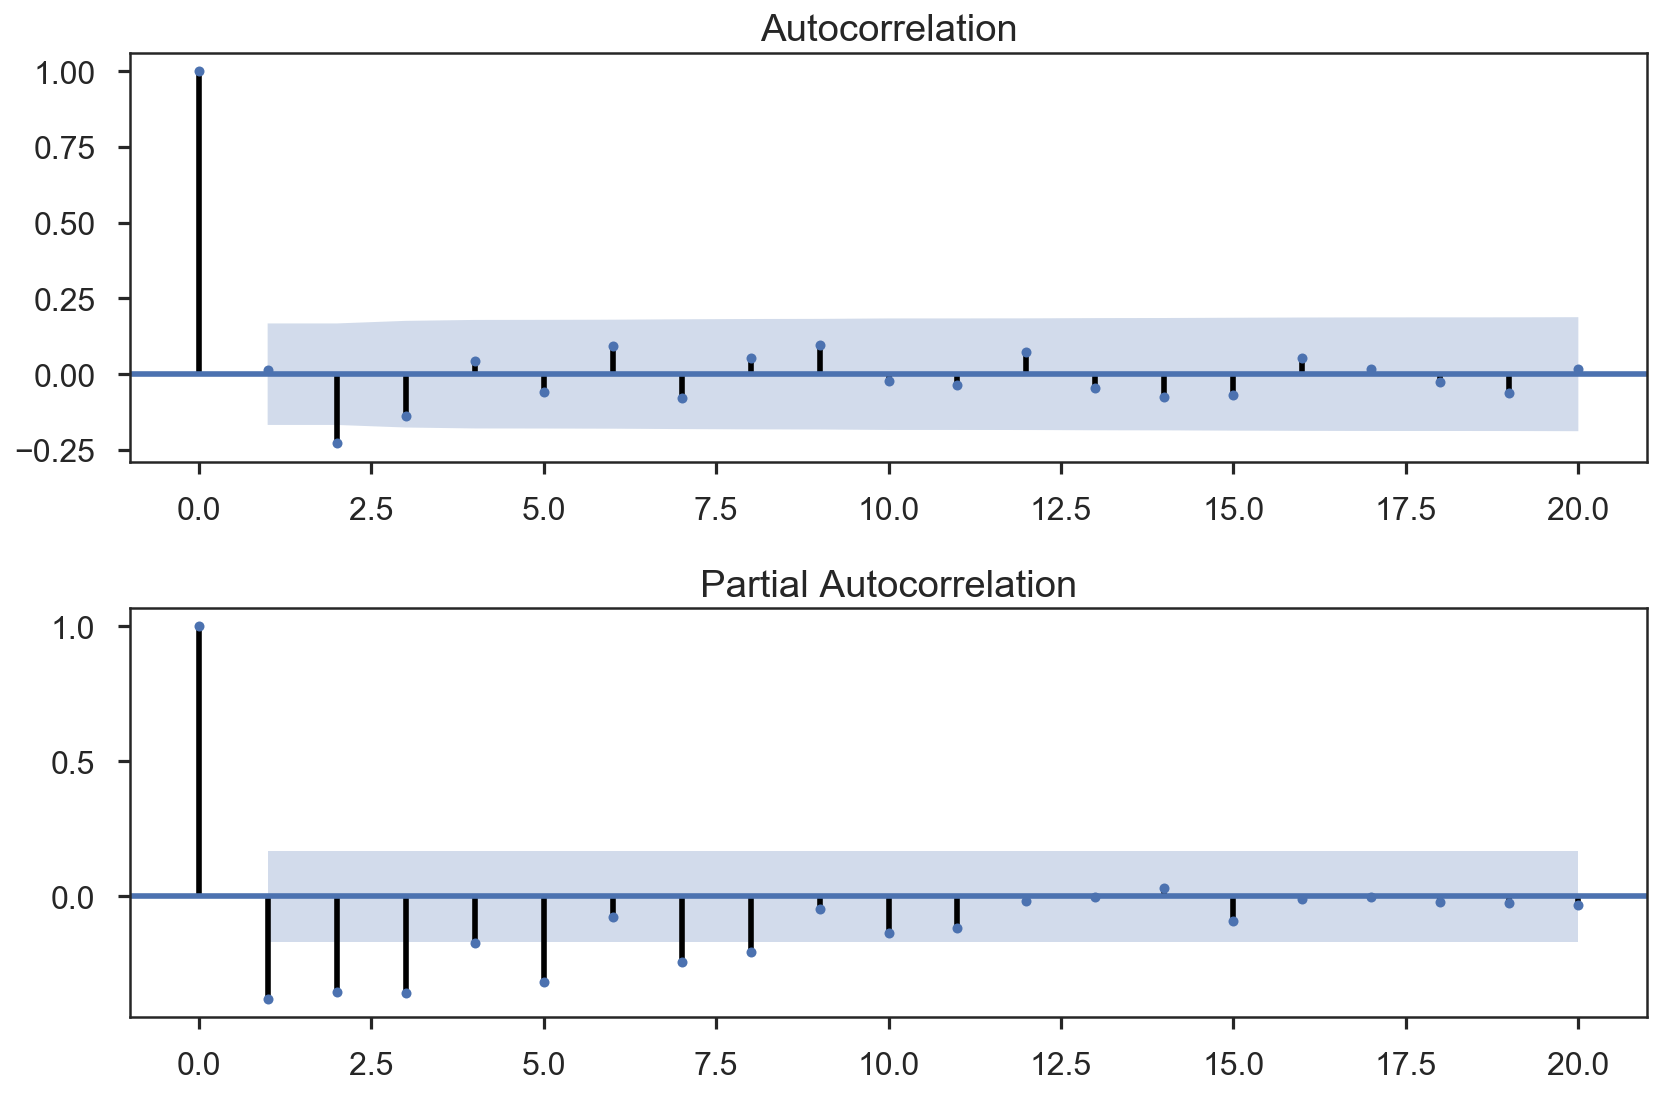

In [17]:


fig=plt.figure(figsize=(12,8))

ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(sentiment_short['diff_1'],lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()


ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(sentiment_short['diff_2'],lags=20,ax=ax2) 
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [18]:
sentiment_short.head()

,UMCSENT,diff_1,diff_2
DATE,,,
2005-03-01,92.60000,-1.50000,-0.10000
2005-04-01,87.70000,-4.90000,-3.40000
2005-05-01,86.90000,-0.80000,4.10000
2005-06-01,96.00000,9.10000,9.90000
2005-07-01,96.50000,0.50000,-8.60000


In [19]:
len(sentiment_short)

137

In [20]:
len(sentiment_short.dropna())

137